In [2]:
%matplotlib inline
import pandas as panpan
import os
import numpy as np
import seaborn as sbrn
import matplotlib as mplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

- Pandas is a software library written for the Python programming language for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series
- The OS module in Python provides a way of using operating system dependent functionality. The functions that the OS provides allows you to interface with the underlying operating system that Python is running on - be it Windows, Mac or Linux
- Numpy is a library for the Python programming language adding support for large, multi-dimensional arrays and matrices, along with a large collection of high level mathematical functions to operate on these arrays
- Seaborn is a Python data visualisation library based on matplotlib. It provides a high level interface for drawing attractive and informative statistical graphics
- Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension Numpy. It provides an object oriented API for embedding plots into applications using general-purpose GUI toolkits like TKinter, wxPython, QT, or GTK+
- pyplot is a state-based interface to matplotlib, and provides a MATLAB way of plotting. It is mainly used for interactive plots and simple cases of programmatic plot generation
- cm consists of builtin colormaps, colormap handling utilities, and the ScalarMappable mixin

https://www.kaggle.com/carrie1/ecommerce-data/kernels
#the above is to import all the necessary libraries required to run the visualisations I need
#the following is writing the raw data into the dataframe in order that we can manipulate the data

In [5]:
#encountered some issues with the encoding when I first attempted to read from CSV, therefore I specified the encoding 
#to overcome this issue
dataf=panpan.read_csv ('data.csv', encoding ="ISO-8859-1") 
dataf.info()
dataf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#calling .describe() on the dataframe will generate some descriptive statistics that summarise the central tendency,dispersion and shape of a dataset's distribution

In [71]:
dataf.describe(percentiles= None, include = 'all')                                                   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [72]:
#the following I tried to run just to see whether any relevant information would come from this visualisation but seems like it is 
#not very relevant here. the dataframe.corr() method returns a correlation matrix that gives an option of using the pearson,
#kendall or spearman methods of calculating correlation coefficients
dataf.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


- the following provides us with some descriptive statistics applied to all the columns in the dataset. As my settings for include has been set to 'all', it will provide a summary of all the columns even when they are of mixed datatypes, whereas the default behaviour is to provide a summary for only numerical columns, such as floating numbers and integers
- We can see that there are 8 columns in the dataset that covers some information on the transactional data such as the dates, prices and description of the transacted items and dates. There is also the origin country of the site's customers
- We can see that although there are 541,909 records there are only 26k unique invoices, and this is spread out over 4k+ types of products. The transactions originate from buyers from 38 countries.
- The average quantity of each transaction comes to 9.5 units per transaction. Because we can also see that the standard deviation is very high we can see that the range of quantities is very huge which can also be observed from the min and max of the quantities. Take note that there is a negative quantity which indicates that the transactions are not just purchases. We can come back to this occurence later in our analysis.
- The numbers show that the average price of an item is at 4.61/unit, presumably in the currency of origin of the site, which could be UK. The variance is also high on this column, indicating a wide range in the numbers. There is also negative prices in this column, possibly linked in some way to the negative quantities. 
- The latest date of all transactions is 31st October 2011.



In [73]:
dataf.describe(percentiles= None, include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [7]:
np.unique(dataf['Country'], return_counts =False)

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom',
       'Unspecified'], dtype=object)

In [8]:
country, counts =np.unique(dataf['Country'],return_counts=True)
# np.sort(np.unique(dataf['Country'],return_counts=True))

CountriesPpl=[]
i=0
for c in country:
    CountriesPpl.append((c,counts[i]))
    i+=1           

In [9]:
CountriesPpl

[('Australia', 1259),
 ('Austria', 401),
 ('Bahrain', 19),
 ('Belgium', 2069),
 ('Brazil', 32),
 ('Canada', 151),
 ('Channel Islands', 758),
 ('Cyprus', 622),
 ('Czech Republic', 30),
 ('Denmark', 389),
 ('EIRE', 8196),
 ('European Community', 61),
 ('Finland', 695),
 ('France', 8557),
 ('Germany', 9495),
 ('Greece', 146),
 ('Hong Kong', 288),
 ('Iceland', 182),
 ('Israel', 297),
 ('Italy', 803),
 ('Japan', 358),
 ('Lebanon', 45),
 ('Lithuania', 35),
 ('Malta', 127),
 ('Netherlands', 2371),
 ('Norway', 1086),
 ('Poland', 341),
 ('Portugal', 1519),
 ('RSA', 58),
 ('Saudi Arabia', 10),
 ('Singapore', 229),
 ('Spain', 2533),
 ('Sweden', 462),
 ('Switzerland', 2002),
 ('USA', 291),
 ('United Arab Emirates', 68),
 ('United Kingdom', 495478),
 ('Unspecified', 446)]

In [10]:
#the following function was written initially to apply a code to each country so I could use it to do some visualisation but 
#have not found a use for it as I later realised I could just rotate the names 90degrees so that it will show nicely on the 
#countplot chart
def country_code(x):
    for i in range(len(country)):
        if x==country[i]:
            return(np.nonzero(country==country[i])[0][0])

In [11]:
dataf['Ccode']=dataf['Country'].apply(country_code)

In [12]:
dataf['Country']

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
5         United Kingdom
6         United Kingdom
7         United Kingdom
8         United Kingdom
9         United Kingdom
10        United Kingdom
11        United Kingdom
12        United Kingdom
13        United Kingdom
14        United Kingdom
15        United Kingdom
16        United Kingdom
17        United Kingdom
18        United Kingdom
19        United Kingdom
20        United Kingdom
21        United Kingdom
22        United Kingdom
23        United Kingdom
24        United Kingdom
25        United Kingdom
26                France
27                France
28                France
29                France
               ...      
541879    United Kingdom
541880    United Kingdom
541881    United Kingdom
541882    United Kingdom
541883    United Kingdom
541884    United Kingdom
541885    United Kingdom
541886    United Kingdom
541887    United Kingdom


In [13]:
#just to confirm that my function is working
dataf.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Ccode
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,13
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,13
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,13
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,13
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,13


[Text(0,0,'United Kingdom'),
 Text(0,0,'France'),
 Text(0,0,'Australia'),
 Text(0,0,'Netherlands'),
 Text(0,0,'Germany'),
 Text(0,0,'Norway'),
 Text(0,0,'EIRE'),
 Text(0,0,'Switzerland'),
 Text(0,0,'Spain'),
 Text(0,0,'Poland'),
 Text(0,0,'Portugal'),
 Text(0,0,'Italy'),
 Text(0,0,'Belgium'),
 Text(0,0,'Lithuania'),
 Text(0,0,'Japan'),
 Text(0,0,'Iceland'),
 Text(0,0,'Channel Islands'),
 Text(0,0,'Denmark'),
 Text(0,0,'Cyprus'),
 Text(0,0,'Sweden'),
 Text(0,0,'Austria'),
 Text(0,0,'Israel'),
 Text(0,0,'Finland'),
 Text(0,0,'Bahrain'),
 Text(0,0,'Greece'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Singapore'),
 Text(0,0,'Lebanon'),
 Text(0,0,'United Arab Emirates'),
 Text(0,0,'Saudi Arabia'),
 Text(0,0,'Czech Republic'),
 Text(0,0,'Canada'),
 Text(0,0,'Unspecified'),
 Text(0,0,'Brazil'),
 Text(0,0,'USA'),
 Text(0,0,'European Community'),
 Text(0,0,'Malta'),
 Text(0,0,'RSA')]

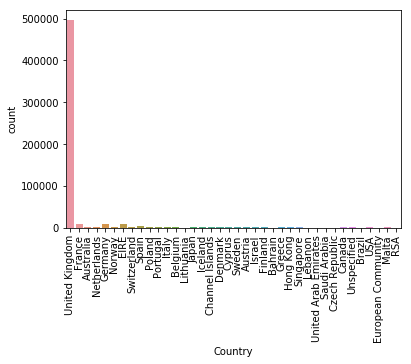

In [14]:
sbrn.countplot(dataf['Country']).set_xticklabels(sbrn.countplot(dataf['Country']).get_xticklabels(),rotation=90)

#After going through the data I realised there were some records with negative quantities and so in the following I decided to list them all out

In [15]:
negquant= dataf[dataf['Quantity']<0]
negquant

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Ccode
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,36
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,36
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,36
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,36
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,36
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,36
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom,36
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,36
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom,36
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom,36


#we can see from the output above that there are 2 types of negative quantities. The first entry marked with stockcode of 'D' and description states 'Discount'
#the other type we can see that the invoiceNo starts with 'C', and after comparison against records with the same stockcode and customerID it seems that there are a few cases where a negative quantity will appear in a record.

1. It happens as a return or cancellation where the entire purchase quantity is negated
2. Certain cases the purchase quantity outnumbers the negative quantity and this could indicate the negative quantity is just a return of faulty items
3. Certain cases we note that the return/cancellation date is earlier than the purchase date indicating it could be a missing purchase record or a mistaken negative record. 
4. every legitimate return(one where return date is later than purchase date) has an invoiceNo that is larger than the related purchase invoiceNo numerically(after stripping away the 'C')

In [16]:
discount=negquant[negquant['Description']=='Discount']
discount

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Ccode
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,36
9038,C537164,D,Discount,-1,12/5/2010 13:21,29.29,14527.0,United Kingdom,36
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498.0,United Kingdom,36
19392,C537857,D,Discount,-1,12/8/2010 16:00,267.12,17340.0,United Kingdom,36
31134,C538897,D,Discount,-1,12/15/2010 9:14,5.76,16422.0,United Kingdom,36
31135,C538897,D,Discount,-1,12/15/2010 9:14,42.50,16422.0,United Kingdom,36
31663,C539003,D,Discount,-1,12/15/2010 12:35,26.93,14527.0,United Kingdom,36
38609,C539589,D,Discount,-1,12/20/2010 13:14,13.88,14527.0,United Kingdom,36
44405,C540171,D,Discount,-1,1/5/2011 12:26,22.97,14527.0,United Kingdom,36
88032,C543752,D,Discount,-1,2/11/2011 14:12,64.27,14031.0,United Kingdom,36


#the following is used to iterate through a dataset, ie to loop through
#potcancel stands for 'potential cancel'
#combitag is used to keep track of stockcode & customer id which we have already used to generate a dataframe view - ie a specific customer's purchase of an item that has a negative quantity- we will list out all the transactions for that item for that customer

In [17]:
num=0
# mylist=[]
potcancel=[]
combitag=[]
#looping through the negative quantity rows
for row in negquant.iterrows():
    #ignore the num, it is just used to make it easy to debug without having to 
    #loop thru the whole dataset
    #if num ==30:
    #break
    #skipping all those with stockCode 'D',ie discounts
    if row[1]['StockCode'] !='D':
        #joining the customerID and stockCode together as a combination so that 
        #we can refer to them to avoid calling this 
        #combination again if it arises again in future iterations
        newset=[row[1]['CustomerID'],row[1]['StockCode']]
        if newset in combitag:
            continue
        else:
            #storing the records for 1 customer and 1 specific item in var for processing
            var=dataf[dataf['CustomerID']==row[1]['CustomerID']]
            var=var[var['StockCode']==row[1]['StockCode']]
            combitag.append([row[1]['CustomerID'],row[1]['StockCode']])        
        
        neg=[]
        pos=[]
        #splitting var into positive and negative
        for bow in var.iterrows():
            if bow[1]['Quantity']<0:
                neg.append(bow)
            else:
                pos.append(bow)
        #if the positive and negative quantities cancel each other out then we put them into a list
        for i in neg:
            for j in pos:
                if (i[1]['Quantity']+j[1]['Quantity']==0):
                        potcancel.append([j,i])
                        
    
    num+=1

In [18]:
#this indicates the number of pairs for each 'customer and item combination' that cancel each other out
len(potcancel)

6085

#after appending transactions that cancel each other out to potcancel we want to do further validation below, ie if the return date is earlier than the purchase date then we ignore, else we will put it under a list of rows that we want to drop

In [19]:
num=0
tag=0
cancel=[]
for i in potcancel:
#     pls ignore the num, it is just used to make it easy for me to debug without having to loop thru the whole dataset
#     if num ==30:
#         break
    if i[0][1]['InvoiceNo'] is None or i[1][1]['InvoiceNo'] is None:
        continue
        #in the line of code below we use '[1:]' to indicate that we want invoice no from 2nd character onwards,
        #thus stripping away the 'C'
    if (int(i[1][1]['InvoiceNo'][1:])>int(i[0][1]['InvoiceNo']))==True:
        cancel.append(i)     
    else:
        tag+=1
        
    num+=1

tag

1743

In [20]:
len(cancel)

4342

In [21]:
#the following is used to ensure that if a negative and positive quantity has cancelled each other out that the same entry will 
#not be used again against another record ie, if there are two positive quantities at +1 each, but one negative quantity of -1,
#then after 2 records cancelling each other that there will be one positive +1 quantity left over
confirmdel=[]
for i in cancel:
    if i[0][0] not in confirmdel and i[1][0]not in confirmdel:
        confirmdel.append(i[0][0])
        confirmdel.append(i[1][0])

In [22]:
len(confirmdel)

5796

In [23]:
dataf=dataf.drop(confirmdel)
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536113 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      536113 non-null object
StockCode      536113 non-null object
Description    534659 non-null object
Quantity       536113 non-null int64
InvoiceDate    536113 non-null object
UnitPrice      536113 non-null float64
CustomerID     401033 non-null float64
Country        536113 non-null object
Ccode          536113 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 30.7+ MB


In [24]:
#dropping records where customerID is null
dataf=dataf[(dataf['CustomerID'].notnull())&(dataf['Quantity'].notnull())]
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401033 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      401033 non-null object
StockCode      401033 non-null object
Description    401033 non-null object
Quantity       401033 non-null int64
InvoiceDate    401033 non-null object
UnitPrice      401033 non-null float64
CustomerID     401033 non-null float64
Country        401033 non-null object
Ccode          401033 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 22.9+ MB


In [25]:
print(format(dataf.duplicated().sum())+' records')
#listing out the records that are duplicated and dropping them from our dataset
dataf.drop_duplicates(inplace = True)

5168 records


In [26]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395865 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      395865 non-null object
StockCode      395865 non-null object
Description    395865 non-null object
Quantity       395865 non-null int64
InvoiceDate    395865 non-null object
UnitPrice      395865 non-null float64
CustomerID     395865 non-null float64
Country        395865 non-null object
Ccode          395865 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 22.7+ MB


#the following is the "number of products" transacted over the "number of transactions" by the "number of customers who bought/returned from the site"

In [27]:
panpan.DataFrame([{'products': len(dataf['StockCode'].value_counts()),    
               'transactions': len(dataf['InvoiceNo'].value_counts()),
               'customers': len(dataf['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3673,21318,4363


#we then proceed to total the number of products that was bought for each invoice that was issued

In [28]:
dataf.groupby(by=['CustomerID','InvoiceNo'], as_index=False)['InvoiceDate'].count()

,CustomerID,InvoiceNo,InvoiceDate
0,12347.0,537626,31
1,12347.0,542237,29
2,12347.0,549222,24
3,12347.0,556201,18
4,12347.0,562032,22
5,12347.0,573511,47
6,12347.0,581180,11
7,12348.0,539318,17
8,12348.0,541998,6
9,12348.0,548955,5


#the following 2 codeblocks give us the quantity of all the products that fall under discount & then the quantity of all the products for the whole dataset

In [29]:
nq1=negquant[negquant['StockCode']!='D']
nq1['Quantity'].sum()

-483337

In [30]:
dataf['Quantity'].sum()

4891346

In [31]:
#NAN_stockcodes are stockcodes that contain alphabets and not just numbers
NAN_stockcodes = dataf[dataf['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
NAN_stockcodes

array(['POST', 'D', 'M', 'BANK CHARGES', 'C2', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [32]:
#the stockcode and the accompanying description
for i in NAN_stockcodes:
    print(i+': '+ dataf[dataf['StockCode']==i]['Description'].unique()[0])

POST: POSTAGE
D: Discount
M: Manual
BANK CHARGES: Bank Charges
C2: CARRIAGE
PADS: PADS TO MATCH ALL CUSHIONS
DOT: DOTCOM POSTAGE
CRUK: CRUK Commission


In [33]:
#the following gives us a dataset that details how many times a particular product was ordered
products_popularity=dataf.groupby(by=['Description'], as_index=False)['InvoiceDate'].count()
products_popularity.sort_values(['InvoiceDate'], ascending=False).rename(columns={'InvoiceDate':'Times Ordered'})

,Description,Times Ordered
3702,WHITE HANGING HEART T-LIGHT HOLDER,2034
2766,REGENCY CAKESTAND 3 TIER,1808
1760,JUMBO BAG RED RETROSPOT,1637
216,ASSORTED COLOUR BIRD ORNAMENT,1399
2343,PARTY BUNTING,1387
1942,LUNCH BAG RED RETROSPOT,1329
3000,SET OF 3 CAKE TINS PANTRY DESIGN,1203
2611,POSTAGE,1150
1934,LUNCH BAG BLACK SKULL.,1087
2268,PACK OF 72 RETROSPOT CAKE CASES,1052


In [34]:
#a statistical description of the above filtered dataset, this could help us in deciding whether there are any products that the
#business operator can either cut off from their inventory or certain inventory that they can stock up more of
products_popularity.describe()
#please comment on what other insights you would potentially derive from this info

,InvoiceDate
count,3882.000000
mean,101.974498
std,158.017001
min,1.000000
25%,10.000000
50%,44.000000
75%,128.000000
max,2034.000000


#the following is downloading certain packages that are required in order for me to run nltk,the python natural language toolkit

In [35]:
import datetime, nltk, warnings
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#the following block of code I have to credit to one of the kaggle user @fabiendaniel who also performed analysis on this dataset. I have gone thru the code to understand what it is trying to do.


In [37]:
is_noun = lambda pos: pos[:2] == 'NN'
#the above will be used in a list comprehension to find the first 2 characters of the nltk.pos_tag returned to determine whether
#the word is a noun

def keywords_inventory(dataframe, column = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = {}  # collect the words / root
    keywords_select = {}  # association: root <-> keyword
    category_keys   = []
    count_keywords  = {}
    icount = 0
    for s in dataframe[column]:
        if panpan.isnull(s): continue
#         if icount ==40: continue
        lines = s.lower()
    #the following tokenizes the description of each item into individual words or characters and pushes into a list
        tokenized = nltk.word_tokenize(lines)
        #nltk.pos_tag tags each word and assigns it a label of what type of word it is
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized)if is_noun(pos)] 
        icount +=1
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            #the following code block pushes the words and the stem of the words into a dictionary along with the count of the 
            #words occurences
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
        
    #the following loop appends the stem of the words into a list and a dictionary which will be used for further processing 
    #later in defining product categories. i have not performed this step yet as of 10/11/2018. will perform it after this
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
    return category_keys, keywords_roots, keywords_select, count_keywords

In [38]:
the_products = panpan.DataFrame(dataf['Description'].unique()).rename(columns = {0:'Description'})
keywords,keywords_roots,keywords_select,count_keywords=keywords_inventory(the_products)

In [39]:
count_keywords

{'heart': 267,
 'holder': 120,
 'metal': 99,
 'lantern': 8,
 'cream': 49,
 'cupid': 2,
 'coat': 7,
 'hanger': 19,
 'union': 28,
 'flag': 12,
 'water': 36,
 'bottl': 44,
 'nest': 3,
 'box': 155,
 'glass': 148,
 'star': 59,
 'hand': 20,
 'jack': 21,
 'bird': 45,
 'ornament': 1,
 'poppi': 7,
 'playhous': 4,
 'bedroom': 1,
 'kitchen': 20,
 'feltcraft': 24,
 'princess': 3,
 'charlott': 11,
 'doll': 11,
 'ivori': 53,
 'cosi': 6,
 'colour': 26,
 'teaspoon': 1,
 'vintag': 211,
 'jigsaw': 15,
 'block': 9,
 'alphabet': 13,
 'home': 49,
 'build': 3,
 'word': 3,
 'love': 9,
 'recip': 6,
 'england': 4,
 'jam': 18,
 'jar': 39,
 'rack': 15,
 'pari': 5,
 'fashion': 3,
 'bath': 8,
 'alarm': 7,
 'clock': 44,
 'bakelik': 4,
 'pink': 188,
 'green': 14,
 'panda': 1,
 'bunni': 25,
 'sheet': 8,
 'tape': 18,
 'globe': 1,
 'head': 3,
 'tail': 4,
 'game': 6,
 'set/2': 1,
 'retrospot': 90,
 'tea': 55,
 'towel': 22,
 'round': 30,
 'snack': 9,
 'woodland': 21,
 'spaceboy': 29,
 'lunch': 27,
 'i': 19,
 'london': 22

In [40]:
#using the count keywords i create a list that lists out the occurence of each word
randlist=[]
for k,v in count_keywords.items():
    randlist.append([keywords_select[k],v])

In [41]:
xlist=sorted(randlist,key=lambda x:x[1],reverse =True)

In [42]:
for i in xlist:
    print(i)

['heart', 267]
['vintage', 211]
['set', 206]
['pink', 188]
['bag', 164]
['box', 155]
['glass', 148]
['christmas', 137]
['design', 128]
['candle', 121]
['holder', 120]
['flower', 119]
['decorative', 109]
['metal', 99]
['retrospot', 90]
['card', 90]
['necklac', 85]
['paper', 83]
['blue', 80]
['art', 75]
['silver', 72]
['cake', 69]
['polkadot', 68]
['cover', 67]
['mug', 66]
['tin', 66]
['wrap', 65]
['sign', 64]
['pack', 61]
['egg', 61]
['bracelet', 61]
['star', 59]
['bowl', 57]
['mini', 56]
['tea', 55]
['wall', 55]
['garden', 54]
['cushion', 54]
['ivory', 53]
['frame', 52]
['mirror', 50]
['cream', 49]
['home', 49]
['gift', 49]
['ring', 46]
['earrings', 46]
['bird', 45]
['bottle', 44]
['clock', 44]
['paisley', 42]
['letter', 42]
['party', 42]
['wood', 40]
['ribbon', 40]
['charm', 40]
['jar', 39]
['hook', 39]
['gold', 39]
['easter', 39]
['garland', 38]
['bead', 38]
['drawer', 37]
['cup', 37]
['zinc', 37]
['water', 36]
['photo', 36]
['bell', 36]
['tray', 35]
['pencil', 35]
['plate', 34]
['sk

['xmas', 1]
['basin', 1]
['tigris', 1]
['eye', 1]
['vinyl', 1]
['pointy', 1]
['k', 1]
['address', 1]
['twine', 1]
['rnd', 1]
['str', 1]
['beauty', 1]
['gebra', 1]
['shutters', 1]
['seafood', 1]
['octagon', 1]
['diva', 1]
['chime', 1]
['folding', 1]
['edge', 1]
['forties', 1]
['blood', 1]
['coney', 1]
['pompom', 1]
['mixing', 1]
['rosette', 1]
['welcome', 1]
['tortilla', 1]
['w/sucker', 1]
['incense/cand', 1]
['cage', 1]
['strawbry', 1]
['highlighter', 1]
['kittens', 1]
['silver/amethyst', 1]
['cartoon', 1]
['doc', 1]
['russel', 1]
['scroll', 1]
['marmalade', 1]
['racing', 1]
['silouette', 1]
['demi', 1]
['choker', 1]
['spice', 1]
['mr', 1]
['sprig', 1]
['vippassport', 1]
['butterfly/crystal', 1]
['w/chime', 1]
['screwdriver', 1]
['spaceball', 1]
['mrs', 1]
['prince', 1]
['bum', 1]
['roccoco', 1]
['sheep', 1]
['freshwater', 1]
['pink/amethyst', 1]
['teal/fuschia', 1]
['fruit+flowers', 1]
['blackblue', 1]
['bus', 1]
['incense+flower', 1]
['desk', 1]
['mock', 1]
['lobster', 1]
['diamon', 

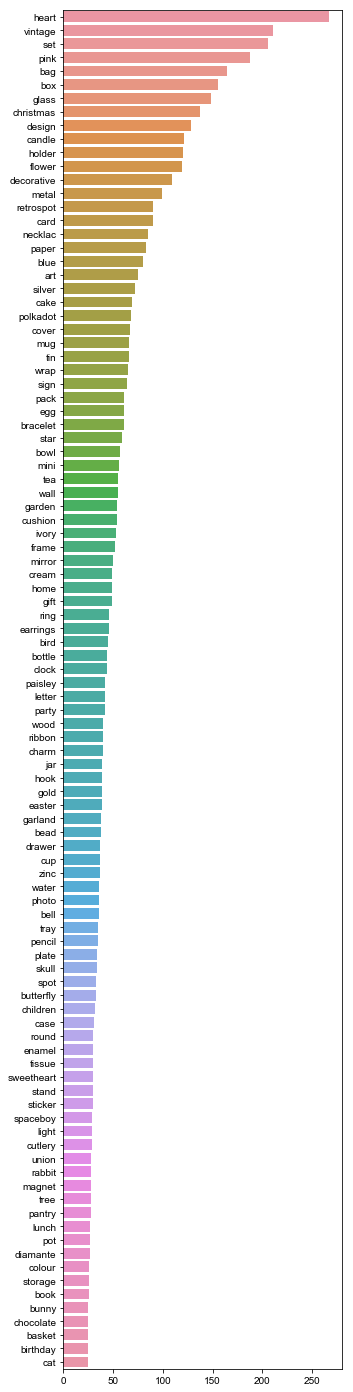

In [43]:
# and i show the top 100 highest occurring words
fig, ax = plt.subplots(figsize =(5,25))
sbrn.set_style("whitegrid",{'grid.linestyle':'-'})
sbrn.barplot(x=[i[1] for i in xlist[:100]],y=[i[0] for i in xlist[:100]])

In [44]:
#i calculate the number of times each customer has performed transactions on the website
transaction_count=dataf.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
transaction_count.rename(columns={'InvoiceNo':'trans_count'})

,CustomerID,trans_count
0,12347.0,182
1,12348.0,31
2,12349.0,73
3,12350.0,17
4,12352.0,81
5,12353.0,4
6,12354.0,58
7,12355.0,13
8,12356.0,59
9,12357.0,131


#for the following i am not sure whether it is correct to do this, ie i set a ground truth to each record based on the number of transactions the customer with a specific customerID has performed, however the ground truth is set to each entry record eventhough it may be the same customer and the same invoice just a different item that they are purchasing. 

After that, I perform the logistic regression based on each record--> please give your comments on this. The reason I do this is I realise that if I use the above dataset where each customer ID is unique then there is not much quantitative data i can use as the predictor variables. 

You will notice that even if i use the entire dataset and not just the one where each customerID is unique, I still do not have many fields with numeric values that I can use to perform a logistic regression. Perhaps I need to work on munging the data to create more predictor variables or usea different algorithm

As a result, the accuracy_score may not be reliable since I am assigning a ground truth based on the grouping of many records but then I use each individual record as an input, thereby skewing the data towards being highly biased to repeat_buyer =1. Please advise on how to proceed from here on out as I am abit stuck at this point.

In [45]:
#i set the ground truth for each transaction based on whether the purchaser has made more than one purchase, calculated by the 
#number of invoices
repeatlis=[]

for i in transaction_count.rename(columns={'InvoiceNo':'trans_count'}).iterrows():
    if i[1]['trans_count']>4:
        dataf.loc[dataf['CustomerID']==i[1]['CustomerID'],'repeat_buyer']=1
    else:
        dataf.loc[dataf['CustomerID']==i[1]['CustomerID'],'repeat_buyer']=0

In [46]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

X = dataf[['Ccode','Quantity','UnitPrice']]
y = dataf['repeat_buyer']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=101)

In [47]:
from sklearn.metrics import accuracy_score

logmodel =LogisticRegression()
logmodel.fit(X_train,y_train)

predictions=logmodel.predict(X_test)

In [48]:
accuracy_score(y_test,predictions)

0.9984759178174469

################################################################################################################################################################################################################################################################

In [49]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
    
list_products

[['heart', 267],
 ['holder', 120],
 ['metal', 99],
 ['cream', 49],
 ['hanger', 19],
 ['union', 28],
 ['water', 36],
 ['bottle', 44],
 ['box', 155],
 ['glass', 148],
 ['star', 59],
 ['hand', 20],
 ['jack', 21],
 ['bird', 45],
 ['kitchen', 20],
 ['feltcraft', 24],
 ['ivory', 53],
 ['colour', 26],
 ['vintage', 211],
 ['jigsaw', 15],
 ['alphabet', 13],
 ['home', 49],
 ['jam', 18],
 ['jar', 39],
 ['rack', 15],
 ['clock', 44],
 ['bunny', 25],
 ['tape', 18],
 ['retrospot', 90],
 ['tea', 55],
 ['towel', 22],
 ['round', 30],
 ['woodland', 21],
 ['spaceboy', 29],
 ['lunch', 27],
 ['london', 22],
 ['bag', 164],
 ['design', 128],
 ['toadstool', 13],
 ['light', 29],
 ['mini', 56],
 ['paper', 83],
 ['christmas', 137],
 ['warmer', 17],
 ['parasol', 16],
 ['coffee', 24],
 ['mug', 66],
 ['wood', 40],
 ['cabinet', 22],
 ['picture', 14],
 ['frame', 52],
 ['wooden', 14],
 ['drawer', 37],
 ['polkadot', 68],
 ['baroque', 22],
 ['toy', 18],
 ['strawberry', 21],
 ['piece', 14],
 ['cutlery', 29],
 ['set', 206]

In [50]:
liste_produits = dataf['Description'].unique()
X = panpan.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))
X

,heart,holder,metal,cream,hanger,union,water,bottle,box,glass,...,drop,earrings,leaf,shell,bead,jewel,orbit,doiley,wallet,point
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0



In [52]:
X

,heart,holder,metal,cream,hanger,union,water,bottle,box,glass,...,orbit,doiley,wallet,point,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
for i, prod in enumerate(liste_produits):
    prix = dataf[ dataf['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [54]:
print("{} {} \n".format('gamme', 'nb. produits') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

gamme nb. produits 
--------------------
0<.<1       963                 
1<.<2       1011                
2<.<3       667                 
3<.<5       611                 
5<.<10      474                 
.>10        156                 


In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

matrix = X.as_matrix()

for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    computecenter =kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg=silhouette_score(matrix,clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


For n_clusters = 3 The average silhouette_score is : 0.10159576132054264
For n_clusters = 4 The average silhouette_score is : 0.1270159746084891
For n_clusters = 5 The average silhouette_score is : 0.1277723069335479
For n_clusters = 6 The average silhouette_score is : 0.14519672182795318
For n_clusters = 7 The average silhouette_score is : 0.14532587092638452
For n_clusters = 8 The average silhouette_score is : 0.14997530708351814
For n_clusters = 9 The average silhouette_score is : 0.15274102156602049


In [60]:
n_clusters =5
silhouette_avg = -1
while silhouette_avg < 0.148:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.14825099621808502


In [61]:
def tester_func(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mplotlib.rc('patch', edgecolor = 'dimgray', linewidth=1)

    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size+(n_clusters + 1) * 10+1000])
    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[clusters ==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower +size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor = color,edgecolor = color, 
                          alpha =0.8)
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight ='bold', 
                 bbox=dict(facecolor = 'white',edgecolor='black', boxstyle ='round, pad=0.3'))
        y_lower = y_upper + 10
        print(y_lower,'----------')
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(clusters.astype(float) / n_clusters)
    ax2.scatter(matrix[:, 0], matrix[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

983 ----------
2004 ----------
2681 ----------
3321 ----------
3942 ----------


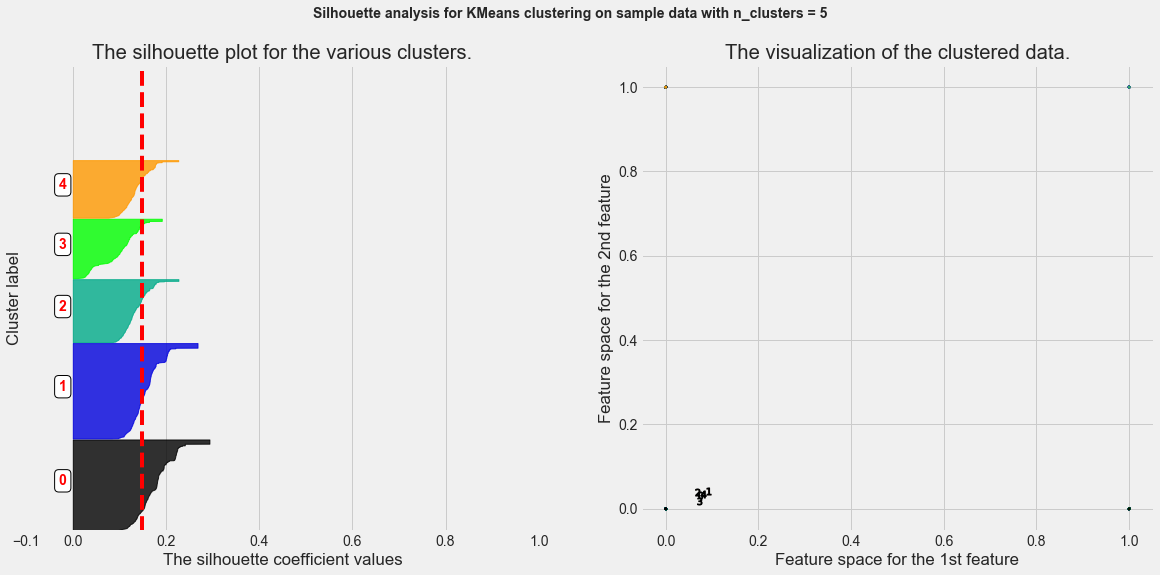

In [62]:
sample_silhouette_values = silhouette_samples(matrix, clusters)
tester_func(n_clusters, [-0.07,0.33], len(X), sample_silhouette_values, clusters)

In [63]:
matrix

[np.where(r==1)[0][0] for r in matrix]

[0,
 2,
 0,
 5,
 0,
 8,
 1,
 5,
 13,
 121,
 14,
 15,
 16,
 8,
 8,
 8,
 21,
 195,
 0,
 83,
 22,
 24,
 24,
 24,
 195,
 25,
 25,
 25,
 149,
 10,
 87,
 18,
 28,
 8,
 8,
 8,
 8,
 36,
 38,
 29,
 18,
 19,
 19,
 18,
 196,
 41,
 11,
 44,
 45,
 46,
 18,
 47,
 47,
 47,
 8,
 18,
 47,
 6,
 0,
 36,
 36,
 36,
 36,
 28,
 53,
 41,
 28,
 8,
 8,
 28,
 61,
 61,
 29,
 59,
 41,
 67,
 36,
 18,
 22,
 28,
 59,
 18,
 2,
 52,
 52,
 52,
 70,
 71,
 28,
 36,
 2,
 2,
 2,
 72,
 72,
 28,
 0,
 29,
 71,
 76,
 78,
 28,
 59,
 44,
 44,
 56,
 55,
 73,
 24,
 21,
 196,
 18,
 85,
 28,
 53,
 9,
 16,
 3,
 3,
 59,
 17,
 47,
 1,
 0,
 193,
 0,
 0,
 0,
 13,
 1,
 0,
 3,
 3,
 3,
 36,
 42,
 47,
 34,
 1,
 28,
 39,
 39,
 39,
 39,
 21,
 0,
 0,
 7,
 103,
 21,
 103,
 175,
 4,
 39,
 5,
 59,
 28,
 53,
 25,
 25,
 16,
 0,
 0,
 22,
 22,
 8,
 0,
 18,
 42,
 1,
 1,
 28,
 41,
 53,
 110,
 0,
 6,
 70,
 91,
 61,
 61,
 28,
 6,
 18,
 91,
 15,
 59,
 47,
 8,
 52,
 82,
 82,
 92,
 10,
 28,
 95,
 11,
 11,
 11,
 37,
 28,
 11,
 110,
 0,
 0,
 16,
 25,
 11,
 16,


In [64]:
matrix[0].shape

(197,)

In [65]:
sample_silhouette_values[20:70]

array([0.13421494, 0.17615994, 0.17615994, 0.17615994, 0.19094532,
       0.17636826, 0.17636826, 0.17636826, 0.18205788, 0.16059743,
       0.21983041, 0.16117002, 0.09371544, 0.1034183 , 0.14553404,
       0.14483641, 0.1710064 , 0.13385938, 0.16665707, 0.11881863,
       0.14758591, 0.18855605, 0.15908688, 0.15068997, 0.05445045,
       0.12235536, 0.16520006, 0.14585458, 0.14188335, 0.20653443,
       0.17625709, 0.12706782, 0.10671176, 0.10679177, 0.04733953,
       0.17625709, 0.1111426 , 0.13728466, 0.10402326, 0.15636996,
       0.15799736, 0.16218923, 0.17674135, 0.09360255, 0.12088207,
       0.11589912, 0.10429671, 0.1162491 , 0.09241063, 0.10614877])

In [66]:
clusters = X.groupby('cluster')

for cluster in clusters.groups:
    f=open('cluster'+str(cluster)+'.csv','w',encoding ="utf-8")
    data = clusters.get_group(cluster)[['0<.<1','.>10']]
    f.write(data.to_csv(index_label='id'))
    f.close()

KeyError: 'cluster'

In [ ]:
myarray=['iampretty','iamwitty']

map(lambda x:int(key.upper() in x), myarray)

In [ ]:
int('heart'.upper() in 'WHITE HANGING HEART T-LIGHT HOLDER')


